In [33]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


/home/ern-lin/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
db = '/home/ern-lin/data_analysis/DZ2/DUQ_hourly.csv'
df = pd.read_csv(db, index_col=['Datetime'], parse_dates=['Datetime'], dayfirst=True)
df

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
...,...
2018-01-01 20:00:00,1962.0
2018-01-01 21:00:00,1940.0
2018-01-01 22:00:00,1891.0


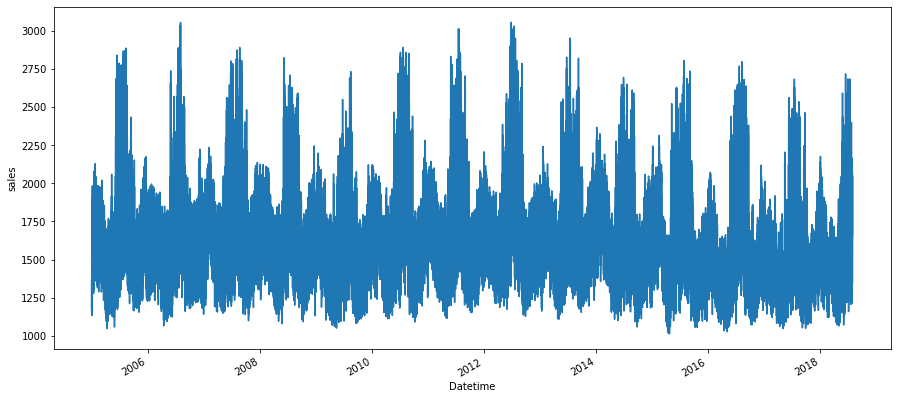

In [29]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [30]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


## Ресемплинг по дням

In [31]:
db = '/home/ern-lin/data_analysis/DZ2/DUQ_hourly.csv'
df = pd.read_csv(db)
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [32]:
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)

In [7]:
df = df.resample('D', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-01,31111.0
2005-01-02,32958.0
2005-01-03,37991.0
2005-01-04,38658.0
2005-01-05,41064.0
...,...
2018-07-30,40457.0
2018-07-31,41635.0
2018-08-01,41793.0


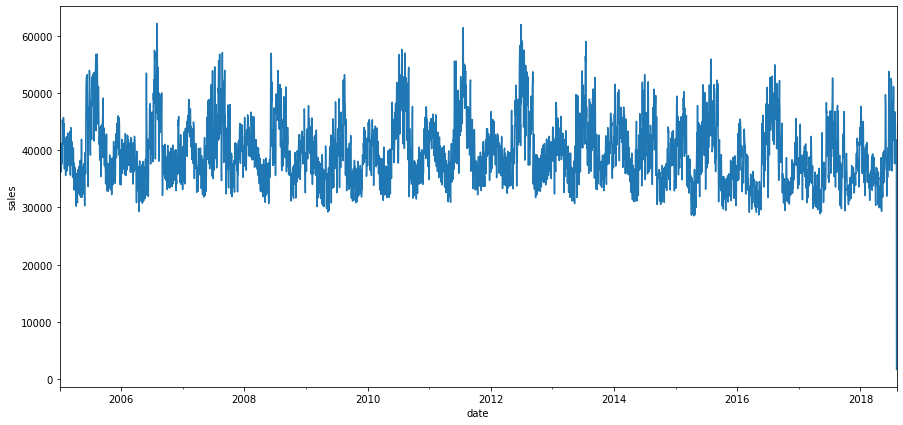

In [8]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [9]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


## Ресемплинг по неделям

In [10]:
db = '/home/ern-lin/data_analysis/DZ2/DUQ_hourly.csv'
df = pd.read_csv(db)
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [11]:
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)

In [12]:
df = df.resample('W', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-02,64069.0
2005-01-09,273052.0
2005-01-16,274529.0
2005-01-23,301980.0
2005-01-30,297042.0
...,...
2018-07-08,323737.0
2018-07-15,322957.0
2018-07-22,307617.0


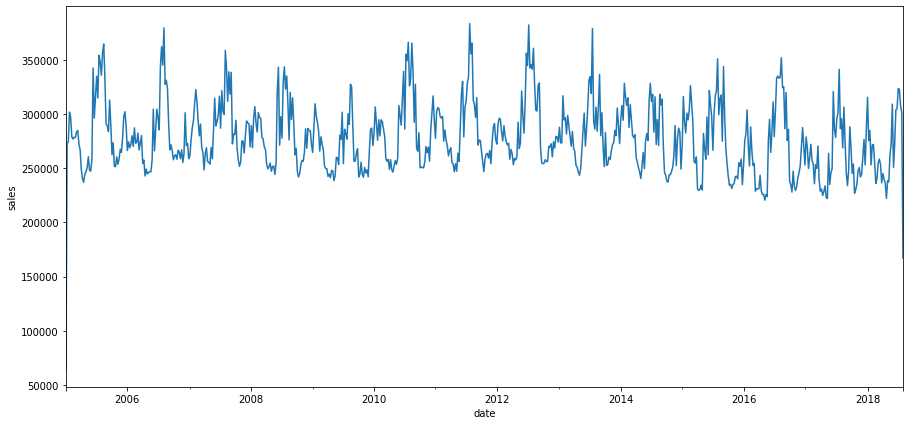

In [13]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [14]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.000000


## Ресемплинг по месяцам

In [15]:
db = '/home/ern-lin/data_analysis/DZ2/DUQ_hourly.csv'
df = pd.read_csv(db)
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [16]:
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)

In [17]:
df = df.resample('M', on = 'date').sum()
df

,DUQ_MW
date,
2005-01-31,1252603.0
2005-02-28,1113277.0
2005-03-31,1215163.0
2005-04-30,1037920.0
2005-05-31,1106793.0
...,...
2018-04-30,1008305.0
2018-05-31,1166120.0
2018-06-30,1203606.0


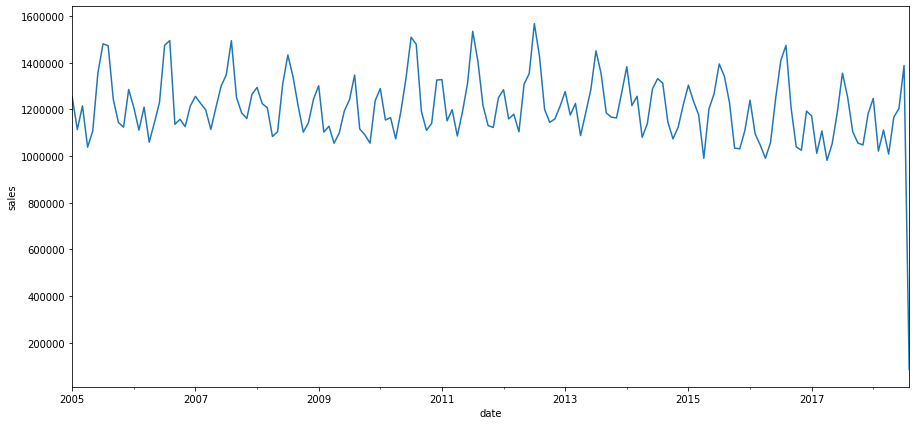

In [18]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [19]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.989844


## Ресемплинг по годам

In [20]:
db = '/home/ern-lin/data_analysis/DZ2/DUQ_hourly.csv'
df = pd.read_csv(db)
df["Datetime"] = pd.to_datetime(df["Datetime"])

In [21]:
df['date'] = df["Datetime"].apply( lambda df : 
datetime.datetime(year=df.year, month=df.month, day=df.day))
df.set_index(df["date"],inplace=True)

In [22]:
df = df.resample('Y', on = 'date').sum()
df

,DUQ_MW
date,
2005-12-31,14830490.0
2006-12-31,14562752.0
2007-12-31,15003675.0
2008-12-31,14699758.0
2009-12-31,13964771.0
2010-12-31,14959342.0
2011-12-31,14925032.0
2012-12-31,15097835.0
2013-12-31,14822887.0


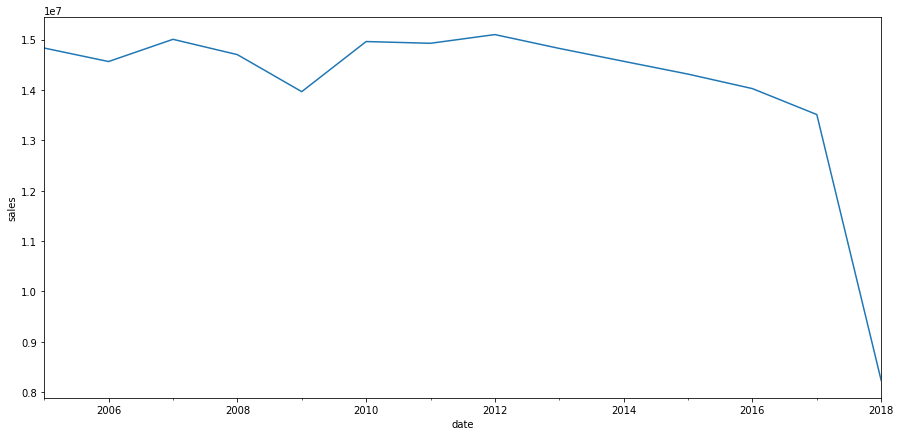

In [25]:
plt.figure(figsize(15,7))
df['DUQ_MW'].plot()
plt.ylabel('sales')
pylab.show()

In [26]:
print(" Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['DUQ_MW'])[1])

 Критерий Дики-Фуллера: p=0.998716
